In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# from IPython.display import Audio
# import librosa
# import librosa.display
# import soundfile
# import os, glob, pickle

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.decomposition import PCA

In [4]:
import keras
#from keras.callbacks import ReduceLROnPlateau
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint



In [ ]:
Features=pd.read_csv('/content/drive/MyDrive/project/features.csv')
# y=df['labels']
# X=df.drop('labels', axis=1)
Features.dropna(inplace=True)

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()



In [ ]:
X.shape

(48648, 191)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1729, shuffle=True, test_size=0.3)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# x_train = np.expand_dims(x_train, axis=1)
# x_test = np.expand_dims(x_test, axis=1)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(34053, 191) (34053, 8) (14595, 191) (14595, 8)
(34053, 191) (34053, 8) (14595, 191) (14595, 8)


In [ ]:
x_t, x_test, y_t, y_test=train_test_split(x_test, y_test, random_state=1729, shuffle=True, test_size=0.4)
print(x_t.shape, y_t.shape, x_test.shape, y_test.shape)

(8757, 191) (8757, 8) (5838, 191) (5838, 8)


In [ ]:
### No of classes
num_labels=Y.shape[1]
num_labels

8

In [ ]:
model=Sequential()
###first layer
model.add(Dense(256,input_shape=(191,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###fourth layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###fifth layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               49152     
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 activation_7 (Activation)   (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)              

In [ ]:
## Trianing my model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/project/audio_trial_proper.hdf5', 
                               verbose=1, save_best_only=True)

history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


Epoch 1/500
1061/1065 [============================>.] - ETA: 0s - loss: 1.3451 - accuracy: 0.4687
Epoch 1: val_loss improved from inf to 1.13810, saving model to /content/drive/MyDrive/project/audio_trial_proper.hdf5
1065/1065 [==============================] - 10s 6ms/step - loss: 1.3452 - accuracy: 0.4686 - val_loss: 1.1381 - val_accuracy: 0.5480
Epoch 2/500
1059/1065 [============================>.] - ETA: 0s - loss: 1.1477 - accuracy: 0.5451
Epoch 2: val_loss improved from 1.13810 to 1.08013, saving model to /content/drive/MyDrive/project/audio_trial_proper.hdf5
1065/1065 [==============================] - 6s 5ms/step - loss: 1.1480 - accuracy: 0.5453 - val_loss: 1.0801 - val_accuracy: 0.5735
Epoch 3/500
1058/1065 [============================>.] - ETA: 0s - loss: 1.0902 - accuracy: 0.5714
Epoch 3: val_loss improved from 1.08013 to 1.03405, saving model to /content/drive/MyDrive/project/audio_trial_proper.hdf5
1065/1065 [==============================] - 6s 5ms/step - loss: 1.0901

In [ ]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.8295649290084839


In [ ]:
test_accuracy=model.evaluate(x_t,y_t,verbose=0)
print(test_accuracy[1])

0.8368162512779236


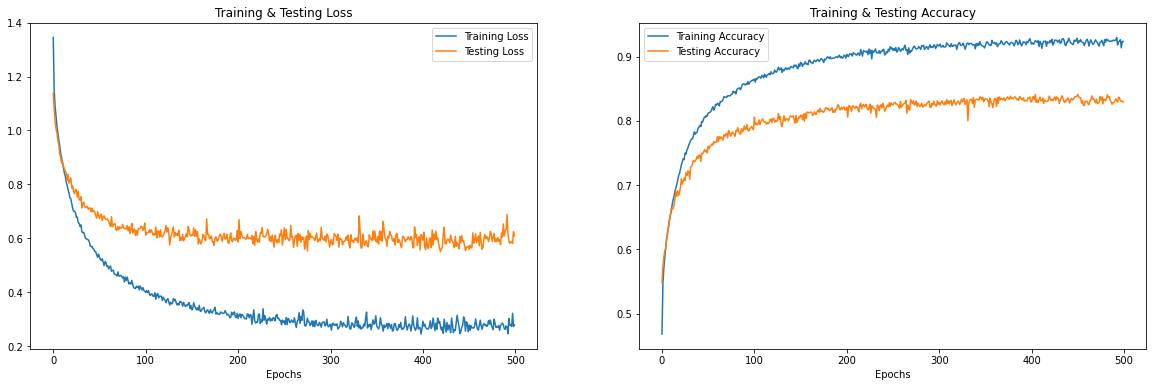

In [ ]:
#print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(500)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

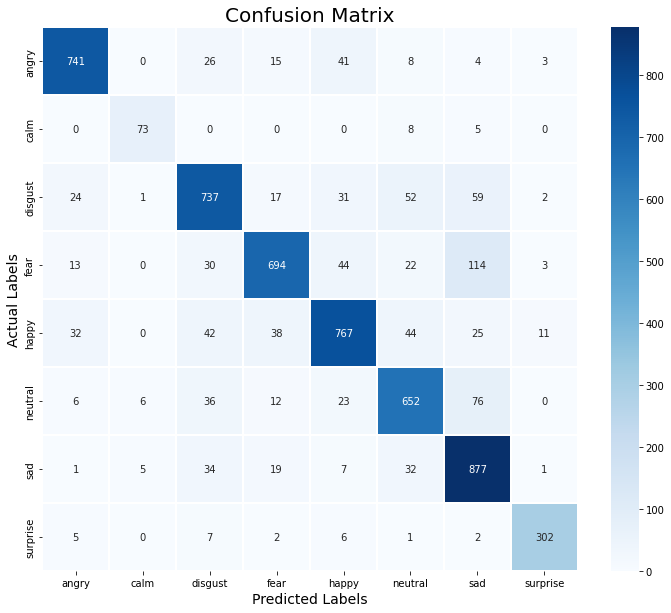

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

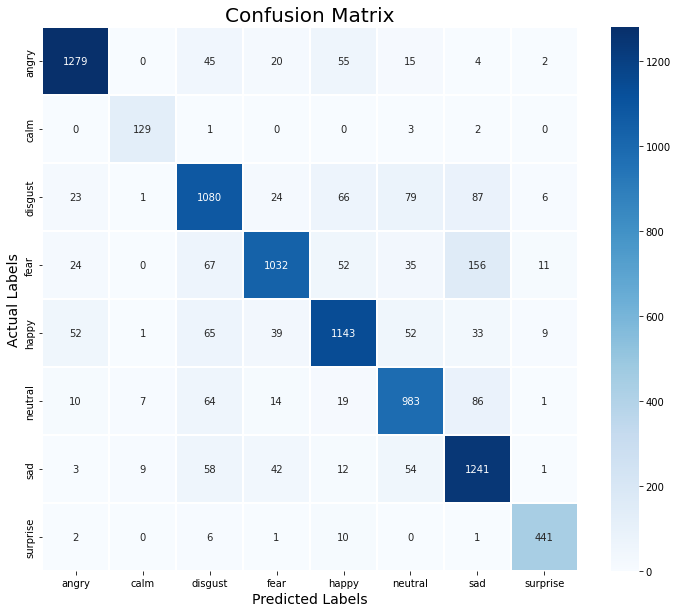

In [ ]:
# predicting on test data.
pred_test = model.predict(x_t)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_t)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/project/acc86')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/project/acc86/assets
